In [1]:
import pandas as pd
import numpy as np
import pickle
import re
from nltk.stem import WordNetLemmatizer 

#import sys/
#!conda install --yes --prefix {sys.prefix} anaconda bcolz 
import bcolz

START_TOKEN = '<START>'
END_TOKEN = '<END>'

In [2]:
pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv",parse_dates=[0],index_col=0)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'S

In [3]:
def read_data():
    data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv",parse_dates=[0],index_col=0)
    dfs = []
    for i in range(1,25):
        col = "Top"+str(i)
        _df = data[[col, 'Label']]
        _df.columns = ['News', 'Label']
        dfs.append(_df)
    result = pd.concat(dfs,ignore_index=True)
    result = result.dropna()
    return result

def process_news(news):
    _news = re.sub('^b', "", news)
    _news = _news.lower()
    _news = re.sub("[^a-zA-Z]", " ",_news)
    _news = re.sub('[\s]+', ' ', _news)
    
    _news = _news.split(" ")
    if "" in _news:
        _news.remove("")
    
    lemmatizer = WordNetLemmatizer() 
    
    _news = [START_TOKEN] + [lemmatizer.lemmatize(w) for w in _news] + [END_TOKEN]
     
    return _news

def read_data():

    data = pd.read_csv("../Datasets/djia/Combined_News_DJIA.csv")
    
    dfs = []
    for i in range(1,25):
        col = "Top"+str(i)
        _df = data[[col, 'Label']]
        _df.columns = ['News', 'Label']
        dfs.append(_df)
    data = pd.concat(dfs,ignore_index=True)
    data = data.dropna()
    data['Tokens'] = data['News'].map(process_news)
    
    Xy_train = data[:int(len(data)*0.8)]
    Xy_test = data[int(len(data)*0.8):]
    
    return data, Xy_train, Xy_test

def read_data():

    data = pd.read_csv("../Datasets/djia/combined_stock_data.csv")
    
    dfs = []
    data["News"] = ""
    for i in range(1,25):
        col = "Top"+str(i)
        data["News"] = data["News"] +" "+ data[col]
    data = data.dropna()
    data['Tokens'] = data['News'].map(process_news)
    
    data = data[['Date', 'News', 'Tokens', 'Label', 'Subjectivity','Objectivity','Positive','Neutral','Negative']]
    
    stock_prices = "../Datasets/djia/upload_DJIA_table.csv"
    stock_data = pd.read_csv(stock_prices)
    
    print(data.head(2))
    print(stock_data.head(2))
    
    
    #merged_dataframe = data.merge(stock_data, how='inner', on='Date')
    merged_dataframe = pd.merge(data, stock_data, how='inner', on = 'Date')

    
    
    
    Xy_train = merged_dataframe[:int(len(data)*0.8)]
    Xy_test = merged_dataframe[int(len(data)*0.8):]
    
    return merged_dataframe, Xy_train, Xy_test


In [4]:
news, Xy_train, Xy_test = read_data()

         Date                                               News  \
0  2008-08-08   b"Georgia 'downs two Russian warplanes' as co...   
1  2008-08-11   b'Why wont America and Nato help us? If they ...   

                                              Tokens  Label  Subjectivity  \
0  [<START>, b, georgia, down, two, russian, warp...      0     75.000000   
1  [<START>, b, why, wont, america, and, nato, he...      1     83.333333   

   Objectivity   Positive    Neutral   Negative  
0    25.000000  18.750000  25.000000  56.250000  
1    16.666667  41.666667  16.666667  41.666667  
         Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  


In [5]:
news.head(10)

,Date,News,Tokens,Label,Subjectivity,Objectivity,Positive,Neutral,Negative,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as co...","[<START>, b, georgia, down, two, russian, warp...",0,75.000000,25.000000,18.750000,25.000000,56.250000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,b'Why wont America and Nato help us? If they ...,"[<START>, b, why, wont, america, and, nato, he...",1,83.333333,16.666667,41.666667,16.666667,41.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,b'Remember that adorable 9-year-old who sang ...,"[<START>, b, remember, that, adorable, year, o...",0,56.250000,43.750000,18.750000,43.750000,37.500000,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran...,"[<START>, b, u, s, refuse, israel, weapon, to,...",0,38.461538,61.538462,15.384615,61.538462,23.076923,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,b'All the experts admit that we should legali...,"[<START>, b, all, the, expert, admit, that, we...",1,45.454545,54.545455,36.363636,54.545455,9.090909,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
5,2008-08-15,"b""Mom of missing gay man: Too bad he's not a ...","[<START>, b, mom, of, missing, gay, man, too, ...",1,70.000000,30.000000,10.000000,30.000000,60.000000,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391
6,2008-08-18,"b'In an Afghan prison, the majority of female...","[<START>, b, in, an, afghan, prison, the, majo...",0,100.000000,0.000000,0.000000,0.000000,100.000000,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648
7,2008-08-19,"b""Man arrested and locked up for five hours a...","[<START>, b, man, arrested, and, locked, up, f...",0,22.222222,77.777778,22.222222,77.777778,0.000000,11478.089844,11478.169922,11318.500000,11348.549805,171580000,11348.549805
8,2008-08-20,b'Two elderly Chinese women have been sentenc...,"[<START>, b, two, elderly, chinese, woman, hav...",1,70.000000,30.000000,10.000000,30.000000,60.000000,11345.940430,11454.150391,11290.580078,11417.429688,144880000,11417.429688
9,2008-08-21,"b""British resident held in Guantanamo Bay win...","[<START>, b, british, resident, held, in, guan...",1,50.000000,50.000000,20.000000,50.000000,30.000000,11415.230469,11476.209961,11315.570312,11430.209961,130020000,11430.209961


In [6]:
lemmatizer = WordNetLemmatizer() 
lemmatizer.lemmatize('warplanes')


'warplane'

In [7]:
from sklearn.decomposition import TruncatedSVD

def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    # Write your implementation here.
        
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M)
    
    # ------------------

    print("Done.")
    return M_reduced

In [8]:
import json


ROOT = "../Embeddings/"

MCO = pd.read_csv(ROOT+"df_M_co_occurrence.csv", index_col = 0)

with open(ROOT+'json_word2Ind_co_occurrence.json') as f:
      W2ICO = json.load(f)
        
M_reduced_co_occurrence = reduce_to_k_dim(MCO, k=50)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting
w2v_embedding = {w: M_normalized[W2ICO[w]] for w in W2ICO}


Running Truncated SVD over 8004 words...
Done.


In [9]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 


def encode_sentence(tokens, vocab2index, N=100):
    
    list_vocab = [x for x in vocab2index.keys()]
    tokens = intersection(tokens, list_vocab)
    encoded = np.zeros(N, dtype=int)
    enc1 = np.array([vocab2index.get(word) for word in tokens])
    length = min(N, len(enc1))
    try:
        encoded[:length] = enc1[:length]
    except:
        print(length)

    return encoded, length

In [10]:
vocab2index=W2ICO
Xy_train['token_numbers'] = Xy_train['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))
Xy_test['token_numbers'] = Xy_test['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))

<ipython-input-10-ff323297f1ba>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  Xy_train['token_numbers'] = Xy_train['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))
<ipython-input-10-ff323297f1ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xy_train['token_numbers'] = Xy_train['Tokens'].apply(lambda tokens: np.array(encode_sentence(tokens,vocab2index )))
<ipython-input-10-ff323297f1ba>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of l

In [11]:
Xy_train.head(2)

,Date,News,Tokens,Label,Subjectivity,Objectivity,Positive,Neutral,Negative,Open,High,Low,Close,Volume,Adj Close,token_numbers
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as co...","[<START>, b, georgia, down, two, russian, warp...",0,75.000000,25.000000,18.750000,25.000000,56.250000,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"[[1, 555, 3016, 2159, 7422, 6123, 7733, 2, 160..."
1,2008-08-11,b'Why wont America and Nato help us? If they ...,"[<START>, b, why, wont, america, and, nato, he...",1,83.333333,16.666667,41.666667,16.666667,41.666667,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,"[[1, 555, 7827, 7890, 270, 292, 4681, 3303, 74..."


In [12]:
emb_dim = 50

In [13]:
len(news)

1986

In [14]:
news.to_csv("news.csv")

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [79]:
#---------------------------------------------------------------------------------------------------------
def create_emb_layer(weights_matrix, non_trainable=False):
    vocab_size, embedding_dim = weights_matrix.shape
    emb_layer = nn.Embedding(vocab_size, embedding_dim )#padding_idx=0)
    emb_layer.weight.data.copy_(torch.from_numpy(weights_matrix).to(device))
    
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer,embedding_dim   

    
#---------------------------------------------------------------------------------------------------------
class LSTM(nn.Module):
    def __init__(self, weights_matrix, hidden_dim, n_layers, 
                 bidirectional):
        
        super().__init__()
        
        self.embedding, embedding_dim = create_emb_layer(weights_matrix, True)
        
        self.lstm = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           bidirectional=bidirectional, 
                           dropout=0.3)
        
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim * 2)
        self.fc2 = nn.Linear(hidden_dim * 2, 1)
        
        self.dropout = nn.Dropout(0.3)
                
        self.sigmoid = nn.Sigmoid()
        
        self.softmax = nn.LogSoftmax()
        
        
        
        
        #numeric
        self.fc3 = nn.Linear(5, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, 1)
        self.fc5 = nn.Linear(2, 1)
        
        
    def forward(self, codes, code_lengths, sentiment):
        
        embedded_codes = self.dropout(self.embedding(codes))
        
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded_codes, code_lengths, batch_first=True, enforce_sorted=False)

        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        fc1_out = self.fc1(hidden)
        
        
        hidden2 = F.relu(fc1_out)
        
        fc2_out = self.fc2(hidden2)
        
        sigmoid_out = self.sigmoid(fc2_out) 
        F.relu(fc1_out)
        
        #sigmoid_out = self.sigmoid(self.fc2(hidden)) 
        
        #nuemrix
        out = self.fc3(sentiment)
        out = F.relu(out)
        out = self.fc4(out)
        out = self.sigmoid(out)
        
        #x = torch.cat((out, sigmoid_out), 1)
        #out = self.fc5(x)
        
        #out = self.sigmoid(out)
        
        
            
        return out
    

In [80]:
import datetime
import torch.optim as optim

def train_model(model, train_dl, val_dl, epochs=10, lr=0.0001):
    directory = datetime.datetime.now().strftime("%X").replace(":","_")

    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = optim.Adam(parameters, lr=lr)
    
    #optimizer = optim.SGD(parameters, lr=lr, momentum=0.9)
    
    loss_list = []
    f_list = []
    for epoch in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x,y,l,s in train_dl:
            x = x.long()
            y = y.long()
            s = s.float()
            y = y.flatten()
            y = torch.tensor(y, dtype=torch.float) 
            x,l,s = x.to(device),l.to(device),s.to(device)

            y_pred = model(x,l,s)
            y_pred = y_pred.cpu()
            optimizer.zero_grad()
                      
            #loss = nn.NLLLoss()(y_pred, y) #nn.BCELoss()(y_pred, y)
            loss = nn.BCELoss()(y_pred, y)
            
            loss.backward()
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        loss_list.append(sum_loss/total)
        val_loss, val_acc, f = validation_metrics(model, val_dl)
        if epoch % 5 == 1:
            print("Epoch: "+str(epoch))
            print("train loss %.3f, val loss %.3f, and val accuracy %.3f " % (sum_loss/total, 0, 0))
            print("Recall: "+ str(f["recall"]))
            print("Precision: "+ str(f["precision"]))
            print("F-measure: "+ str(f["f_measure"]))
            
            save_model(directory,model,optimizer,epoch, loss, f["f_measure"])
            f_list.append(f["f_measure"])

    return loss_list, []


In [81]:
# Create target Directory if don't exist
import os 

def save_model(directory, model,optimizer, epoch, loss, val_f_measure):
    dirName = "models/"+datetime.datetime.now().strftime("%x").replace("/","_")

    if not os.path.exists(dirName):
        os.mkdir(dirName)
        
    if not os.path.exists(dirName + "/"+directory):
        os.mkdir(dirName + "/"+directory) 
    
    PATH = dirName + "/"+directory+"/"+datetime.datetime.now().strftime("%X").replace(":","_")
       
    torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss,
                'val_f_measure': val_f_measure
                }, PATH)

In [82]:
from torch.utils.data import Dataset, DataLoader
class CodesDataset(Dataset):
    def __init__(self, X, X_sentiment, Y):
        self.X = X
        self.y = Y
        self.X_sentiment = X_sentiment
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        """print(self.X[idx])
        print(self.X[idx][0])
        print(self.X[idx][1])"""
        if self.X[idx][1]==0:
            print(self.X[idx][0])
        return torch.from_numpy(np.array(self.X[idx][0]).astype(np.int32)), self.y[idx], self.X[idx][1] , self.X_sentiment[idx]

In [83]:
for x,y,l,s in train_dl:
    print(s)

tensor([[83.3333, 16.6667, 66.6667, 16.6667, 16.6667],
        [45.4545, 54.5455, 18.1818, 54.5455, 27.2727],
        [75.0000, 25.0000, 50.0000, 25.0000, 25.0000],
        ...,
        [35.7143, 64.2857, 14.2857, 64.2857, 21.4286],
        [50.0000, 50.0000, 10.0000, 50.0000, 40.0000],
        [57.1429, 42.8571, 14.2857, 42.8571, 42.8571]], dtype=torch.float64)
tensor([[40.0000, 60.0000, 20.0000, 60.0000, 20.0000],
        [50.0000, 50.0000, 12.5000, 50.0000, 37.5000],
        [46.1538, 53.8462, 23.0769, 53.8462, 23.0769],
        ...,
        [35.7143, 64.2857,  7.1429, 64.2857, 28.5714],
        [37.5000, 62.5000, 25.0000, 62.5000, 12.5000],
        [43.7500, 56.2500, 12.5000, 56.2500, 31.2500]], dtype=torch.float64)


In [84]:
X_train = Xy_train['token_numbers'].values
X_train_sentiment = Xy_train[['Subjectivity', 'Objectivity', 'Positive', 'Neutral', 'Negative']].values
y_train = Xy_train['Label'].values

X_test = Xy_test['token_numbers'].values
X_test_sentiment = Xy_test[['Subjectivity', 'Objectivity', 'Positive', 'Neutral', 'Negative']].values
y_test = Xy_test['Label'].values


In [85]:
X_train_sentiment[:10000]

array([[ 75.        ,  25.        ,  18.75      ,  25.        ,
         56.25      ],
       [ 83.33333333,  16.66666667,  41.66666667,  16.66666667,
         41.66666667],
       [ 56.25      ,  43.75      ,  18.75      ,  43.75      ,
         37.5       ],
       ...,
       [ 66.66666667,  33.33333333,  16.66666667,  33.33333333,
         50.        ],
       [100.        ,   0.        ,  40.        ,   0.        ,
         60.        ],
       [ 66.66666667,  33.33333333,  16.66666667,  33.33333333,
         50.        ]])

In [86]:
train_ds = CodesDataset(X_train[:10000],X_train_sentiment[:10000], y_train[:10000])
test_ds = CodesDataset(X_test[:2000],X_test_sentiment[:2000],  y_test[:2000])


#train_ds = CodesDataset(X_train, y_train)
#test_ds = CodesDataset(X_test, y_test)

In [87]:
batch_size = 1000

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [88]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [89]:
y_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [90]:
def validation_metrics (model, valid_dl):
    model.eval()
    correct = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    total = 0
    
    
    
    sum_loss = 0.0
    sum_rmse = 0.0
    for x,y,l,s in valid_dl:
        x = x.long()
        y = y.long()
        s = s.float()
        y = y.flatten()
        y = torch.tensor(y, dtype=torch.float) 
        x,l,s = x.to(device),l.to(device),s.to(device)

        
        y_hat = model(x,l,s)
        y_hat = y_hat.cpu()
        
        loss = nn.BCELoss()(y_hat, y)
        #loss = nn.BCEWithLogitsLoss()(y_hat, y.reshape(-1,1))
        #print(y_hat)
        pred = (y_hat>0.5).float()
        #pred = torch.round(torch.sigmoid(y_hat))
        #print(pred.shape)
        #print(pred)
        y = y.reshape(-1,1)
        tp += ((pred == 1)&(y == 1)).float().sum() 
        tn += ((pred == 0)&(y == 0)).float().sum() 
        fp += ((pred == 1)&(y == 0)).float().sum() 
        fn += ((pred == 0)&(y == 1)).float().sum() 
        
        total += y.shape[0]
        sum_loss += loss.item()*y.shape[0]
        
    print(tp)
    print(fp)
    print(tn)
    print(fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f_measure = (2 * precision * recall) / (precision + recall)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
        
    f = {"precision": precision.item(), "recall":recall.item(), "f_measure": f_measure.item(), "accuracy": accuracy.item()}
    return sum_loss/total, accuracy, f

In [91]:
CODE_WEIGHT_METRIX = M_normalized

HIDDEN_DIM = 50
N_LAYERS = 2
BIDIRECTIONAL = True

model = LSTM(CODE_WEIGHT_METRIX,
            HIDDEN_DIM,
            N_LAYERS, 
            BIDIRECTIONAL)
model.to(device)

LSTM(
  (embedding): Embedding(8004, 50)
  (lstm): LSTM(50, 50, num_layers=2, dropout=0.3, bidirectional=True)
  (fc1): Linear(in_features=100, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (sigmoid): Sigmoid()
  (softmax): LogSoftmax()
  (fc3): Linear(in_features=5, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
  (fc5): Linear(in_features=2, out_features=1, bias=True)
)

In [92]:
loss_list, f_list = train_model(model, train_dl, test_dl, epochs=2000, lr=0.001)

<ipython-input-80-7ffd936d2ec1>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-90-d4f8ed168f0c>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(35.)
tensor(31.)
tensor(165.)
tensor(167.)
tensor(129.)
tensor(133.)
tensor(63.)
tensor(73.)
Epoch: 1
train loss 2.234, val loss 0.000, and val accuracy 0.000 
Recall: 0.6386138796806335
Precision: 0.49236640334129333
F-measure: 0.556034505367279
tensor(167.)
tensor(168.)
tensor(28.)
tensor(35.)
tensor(182.)
tensor(182.)
tensor(14.)
tensor(20.)
tensor(202.)
tensor(195.)
tensor(1.)
tensor(0.)
tensor(202.)
tensor(195.)
tensor(1.)
tensor(0.)
tensor(181.)
tensor(183.)
tensor(13.)
tensor(21.)
Epoch: 6
train loss 1.320, val loss 0.000, and val accuracy 0.000 
Recall: 0.896039605140686
Precision: 0.4972527325153351
F-measure: 0.6395759582519531
tensor(167.)
tensor(168.)
tensor(28.)
tensor(35.)
tensor(67.)
tensor(72.)
tensor(124.)
tensor(135.)
tensor(21.)
tensor(19.)
tensor(177.)
tensor(181.)
tensor(17.)
tensor(18.)
tensor(178.)
tensor(185.)
tensor(61.)
tensor(64.)
tensor(132.)
tensor(141.)
Epoch: 11
train loss 0.864, val loss 0.000, and val accuracy 0.000 
Recall: 0.301980197429657
Pre

tensor(103.)
tensor(116.)
tensor(80.)
tensor(99.)
tensor(115.)
tensor(128.)
tensor(68.)
tensor(87.)
tensor(126.)
tensor(137.)
tensor(59.)
tensor(76.)
tensor(126.)
tensor(137.)
tensor(59.)
tensor(76.)
tensor(113.)
tensor(126.)
tensor(70.)
tensor(89.)
Epoch: 106
train loss 0.685, val loss 0.000, and val accuracy 0.000 
Recall: 0.5594059228897095
Precision: 0.47280335426330566
F-measure: 0.5124716758728027
tensor(113.)
tensor(126.)
tensor(70.)
tensor(89.)
tensor(124.)
tensor(135.)
tensor(61.)
tensor(78.)
tensor(126.)
tensor(137.)
tensor(59.)
tensor(76.)
tensor(126.)
tensor(137.)
tensor(59.)
tensor(76.)
tensor(117.)
tensor(132.)
tensor(64.)
tensor(85.)
Epoch: 111
train loss 0.684, val loss 0.000, and val accuracy 0.000 
Recall: 0.5792078971862793
Precision: 0.46987950801849365
F-measure: 0.5188469886779785
tensor(110.)
tensor(124.)
tensor(72.)
tensor(92.)
tensor(124.)
tensor(135.)
tensor(61.)
tensor(78.)
tensor(126.)
tensor(137.)
tensor(59.)
tensor(76.)
tensor(126.)
tensor(137.)
tensor(59.

tensor(90.)
tensor(126.)
tensor(135.)
tensor(61.)
tensor(76.)
tensor(131.)
tensor(141.)
tensor(55.)
tensor(71.)
tensor(128.)
tensor(137.)
tensor(59.)
tensor(74.)
Epoch: 206
train loss 0.681, val loss 0.000, and val accuracy 0.000 
Recall: 0.6336633563041687
Precision: 0.4830188751220703
F-measure: 0.5481798648834229
tensor(124.)
tensor(133.)
tensor(63.)
tensor(78.)
tensor(124.)
tensor(133.)
tensor(63.)
tensor(78.)
tensor(128.)
tensor(137.)
tensor(59.)
tensor(74.)
tensor(124.)
tensor(135.)
tensor(61.)
tensor(78.)
tensor(119.)
tensor(131.)
tensor(65.)
tensor(83.)
Epoch: 211
train loss 0.680, val loss 0.000, and val accuracy 0.000 
Recall: 0.5891088843345642
Precision: 0.47600001096725464
F-measure: 0.5265486836433411
tensor(120.)
tensor(131.)
tensor(65.)
tensor(82.)
tensor(126.)
tensor(137.)
tensor(59.)
tensor(76.)
tensor(126.)
tensor(135.)
tensor(61.)
tensor(76.)
tensor(119.)
tensor(129.)
tensor(67.)
tensor(83.)
tensor(124.)
tensor(133.)
tensor(63.)
tensor(78.)
Epoch: 216
train loss 0.6

tensor(123.)
tensor(134.)
tensor(62.)
tensor(79.)
tensor(120.)
tensor(131.)
tensor(65.)
tensor(82.)
tensor(121.)
tensor(132.)
tensor(64.)
tensor(81.)
tensor(121.)
tensor(131.)
tensor(65.)
tensor(81.)
tensor(123.)
tensor(131.)
tensor(65.)
tensor(79.)
Epoch: 311
train loss 0.679, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.4842519760131836
F-measure: 0.5394737124443054
tensor(123.)
tensor(131.)
tensor(65.)
tensor(79.)
tensor(123.)
tensor(131.)
tensor(65.)
tensor(79.)
tensor(125.)
tensor(133.)
tensor(63.)
tensor(77.)
tensor(127.)
tensor(136.)
tensor(60.)
tensor(75.)
tensor(118.)
tensor(128.)
tensor(68.)
tensor(84.)
Epoch: 316
train loss 0.679, val loss 0.000, and val accuracy 0.000 
Recall: 0.5841584205627441
Precision: 0.4796747863292694
F-measure: 0.526785671710968
tensor(118.)
tensor(128.)
tensor(68.)
tensor(84.)
tensor(125.)
tensor(134.)
tensor(62.)
tensor(77.)
tensor(120.)
tensor(130.)
tensor(66.)
tensor(82.)
tensor(123.)
tensor(131.)
tensor(65.)
t

tensor(146.)
tensor(151.)
tensor(45.)
tensor(56.)
tensor(145.)
tensor(150.)
tensor(46.)
tensor(57.)
Epoch: 411
train loss 0.681, val loss 0.000, and val accuracy 0.000 
Recall: 0.7178217768669128
Precision: 0.49152541160583496
F-measure: 0.5835009813308716
tensor(111.)
tensor(118.)
tensor(78.)
tensor(91.)
tensor(123.)
tensor(133.)
tensor(63.)
tensor(79.)
tensor(125.)
tensor(134.)
tensor(62.)
tensor(77.)
tensor(122.)
tensor(132.)
tensor(64.)
tensor(80.)
tensor(120.)
tensor(130.)
tensor(66.)
tensor(82.)
Epoch: 416
train loss 0.678, val loss 0.000, and val accuracy 0.000 
Recall: 0.594059407711029
Precision: 0.47999998927116394
F-measure: 0.5309734344482422
tensor(129.)
tensor(136.)
tensor(60.)
tensor(73.)
tensor(142.)
tensor(149.)
tensor(47.)
tensor(60.)
tensor(115.)
tensor(123.)
tensor(73.)
tensor(87.)
tensor(125.)
tensor(134.)
tensor(62.)
tensor(77.)
tensor(123.)
tensor(134.)
tensor(62.)
tensor(79.)
Epoch: 421
train loss 0.678, val loss 0.000, and val accuracy 0.000 
Recall: 0.60891091

tensor(129.)
tensor(136.)
tensor(60.)
tensor(73.)
tensor(123.)
tensor(133.)
tensor(63.)
tensor(79.)
tensor(106.)
tensor(116.)
tensor(80.)
tensor(96.)
tensor(123.)
tensor(132.)
tensor(64.)
tensor(79.)
tensor(127.)
tensor(133.)
tensor(63.)
tensor(75.)
Epoch: 516
train loss 0.678, val loss 0.000, and val accuracy 0.000 
Recall: 0.6287128925323486
Precision: 0.48846152424812317
F-measure: 0.5497835278511047
tensor(116.)
tensor(124.)
tensor(72.)
tensor(86.)
tensor(123.)
tensor(130.)
tensor(66.)
tensor(79.)
tensor(129.)
tensor(136.)
tensor(60.)
tensor(73.)
tensor(109.)
tensor(119.)
tensor(77.)
tensor(93.)
tensor(119.)
tensor(129.)
tensor(67.)
tensor(83.)
Epoch: 521
train loss 0.679, val loss 0.000, and val accuracy 0.000 
Recall: 0.5891088843345642
Precision: 0.47983869910240173
F-measure: 0.5288888812065125
tensor(125.)
tensor(133.)
tensor(63.)
tensor(77.)
tensor(114.)
tensor(123.)
tensor(73.)
tensor(88.)
tensor(122.)
tensor(130.)
tensor(66.)
tensor(80.)
tensor(127.)
tensor(133.)
tensor(63.

tensor(143.)
tensor(140.)
tensor(56.)
tensor(59.)
tensor(124.)
tensor(132.)
tensor(64.)
tensor(78.)
Epoch: 616
train loss 0.679, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820075989
Precision: 0.484375
F-measure: 0.5414847731590271
tensor(112.)
tensor(120.)
tensor(76.)
tensor(90.)
tensor(123.)
tensor(131.)
tensor(65.)
tensor(79.)
tensor(120.)
tensor(128.)
tensor(68.)
tensor(82.)
tensor(114.)
tensor(123.)
tensor(73.)
tensor(88.)
tensor(129.)
tensor(133.)
tensor(63.)
tensor(73.)
Epoch: 621
train loss 0.676, val loss 0.000, and val accuracy 0.000 
Recall: 0.6386138796806335
Precision: 0.49236640334129333
F-measure: 0.556034505367279
tensor(125.)
tensor(133.)
tensor(63.)
tensor(77.)
tensor(122.)
tensor(130.)
tensor(66.)
tensor(80.)
tensor(124.)
tensor(132.)
tensor(64.)
tensor(78.)
tensor(122.)
tensor(130.)
tensor(66.)
tensor(80.)
tensor(124.)
tensor(133.)
tensor(63.)
tensor(78.)
Epoch: 626
train loss 0.676, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820075989
Pr

tensor(130.)
tensor(134.)
tensor(62.)
tensor(72.)
tensor(142.)
tensor(143.)
tensor(53.)
tensor(60.)
tensor(117.)
tensor(124.)
tensor(72.)
tensor(85.)
tensor(114.)
tensor(122.)
tensor(74.)
tensor(88.)
tensor(163.)
tensor(158.)
tensor(38.)
tensor(39.)
Epoch: 721
train loss 0.675, val loss 0.000, and val accuracy 0.000 
Recall: 0.8069307208061218
Precision: 0.5077881813049316
F-measure: 0.6233269572257996
tensor(116.)
tensor(126.)
tensor(70.)
tensor(86.)
tensor(109.)
tensor(117.)
tensor(79.)
tensor(93.)
tensor(143.)
tensor(140.)
tensor(56.)
tensor(59.)
tensor(113.)
tensor(121.)
tensor(75.)
tensor(89.)
tensor(119.)
tensor(127.)
tensor(69.)
tensor(83.)
Epoch: 726
train loss 0.677, val loss 0.000, and val accuracy 0.000 
Recall: 0.5891088843345642
Precision: 0.48373982310295105
F-measure: 0.53125
tensor(129.)
tensor(134.)
tensor(62.)
tensor(73.)
tensor(110.)
tensor(120.)
tensor(76.)
tensor(92.)
tensor(126.)
tensor(133.)
tensor(63.)
tensor(76.)
tensor(127.)
tensor(133.)
tensor(63.)
tensor(75.

tensor(118.)
tensor(125.)
tensor(71.)
tensor(84.)
tensor(155.)
tensor(150.)
tensor(46.)
tensor(47.)
tensor(118.)
tensor(124.)
tensor(72.)
tensor(84.)
Epoch: 821
train loss 0.677, val loss 0.000, and val accuracy 0.000 
Recall: 0.5841584205627441
Precision: 0.4876033067703247
F-measure: 0.5315315127372742
tensor(103.)
tensor(116.)
tensor(80.)
tensor(99.)
tensor(143.)
tensor(138.)
tensor(58.)
tensor(59.)
tensor(125.)
tensor(131.)
tensor(65.)
tensor(77.)
tensor(90.)
tensor(98.)
tensor(98.)
tensor(112.)
tensor(167.)
tensor(163.)
tensor(33.)
tensor(35.)
Epoch: 826
train loss 0.678, val loss 0.000, and val accuracy 0.000 
Recall: 0.8267326951026917
Precision: 0.5060606002807617
F-measure: 0.6278195381164551
tensor(119.)
tensor(125.)
tensor(71.)
tensor(83.)
tensor(119.)
tensor(125.)
tensor(71.)
tensor(83.)
tensor(147.)
tensor(147.)
tensor(49.)
tensor(55.)
tensor(119.)
tensor(127.)
tensor(69.)
tensor(83.)
tensor(109.)
tensor(119.)
tensor(77.)
tensor(93.)
Epoch: 831
train loss 0.675, val loss 0

tensor(118.)
tensor(125.)
tensor(71.)
tensor(84.)
tensor(160.)
tensor(154.)
tensor(42.)
tensor(42.)
tensor(118.)
tensor(125.)
tensor(71.)
tensor(84.)
tensor(113.)
tensor(123.)
tensor(73.)
tensor(89.)
tensor(151.)
tensor(147.)
tensor(49.)
tensor(51.)
Epoch: 926
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.7475247383117676
Precision: 0.5067114233970642
F-measure: 0.6039999723434448
tensor(123.)
tensor(129.)
tensor(67.)
tensor(79.)
tensor(113.)
tensor(122.)
tensor(74.)
tensor(89.)
tensor(150.)
tensor(144.)
tensor(52.)
tensor(52.)
tensor(120.)
tensor(128.)
tensor(68.)
tensor(82.)
tensor(128.)
tensor(133.)
tensor(63.)
tensor(74.)
Epoch: 931
train loss 0.675, val loss 0.000, and val accuracy 0.000 
Recall: 0.6336633563041687
Precision: 0.49042144417762756
F-measure: 0.5529157519340515
tensor(141.)
tensor(138.)
tensor(58.)
tensor(61.)
tensor(113.)
tensor(121.)
tensor(75.)
tensor(89.)
tensor(124.)
tensor(130.)
tensor(66.)
tensor(78.)
tensor(148.)
tensor(142.)
tensor(54.)

tensor(109.)
tensor(117.)
tensor(79.)
tensor(93.)
tensor(143.)
tensor(140.)
tensor(56.)
tensor(59.)
tensor(118.)
tensor(126.)
tensor(70.)
tensor(84.)
Epoch: 1026
train loss 0.679, val loss 0.000, and val accuracy 0.000 
Recall: 0.5841584205627441
Precision: 0.4836065471172333
F-measure: 0.5291479229927063
tensor(52.)
tensor(67.)
tensor(129.)
tensor(150.)
tensor(165.)
tensor(161.)
tensor(35.)
tensor(37.)
tensor(126.)
tensor(131.)
tensor(65.)
tensor(76.)
tensor(110.)
tensor(119.)
tensor(77.)
tensor(92.)
tensor(165.)
tensor(161.)
tensor(35.)
tensor(37.)
Epoch: 1031
train loss 0.675, val loss 0.000, and val accuracy 0.000 
Recall: 0.8168317079544067
Precision: 0.5061349868774414
F-measure: 0.6250000596046448
tensor(117.)
tensor(125.)
tensor(71.)
tensor(85.)
tensor(93.)
tensor(102.)
tensor(94.)
tensor(109.)
tensor(144.)
tensor(141.)
tensor(55.)
tensor(58.)
tensor(120.)
tensor(125.)
tensor(71.)
tensor(82.)
tensor(120.)
tensor(125.)
tensor(71.)
tensor(82.)
Epoch: 1036
train loss 0.675, val lo

tensor(121.)
tensor(127.)
tensor(69.)
tensor(81.)
tensor(137.)
tensor(136.)
tensor(60.)
tensor(65.)
tensor(142.)
tensor(139.)
tensor(57.)
tensor(60.)
tensor(121.)
tensor(127.)
tensor(69.)
tensor(81.)
tensor(121.)
tensor(127.)
tensor(69.)
tensor(81.)
Epoch: 1131
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.5990098714828491
Precision: 0.4879032373428345
F-measure: 0.5377777814865112
tensor(121.)
tensor(127.)
tensor(69.)
tensor(81.)
tensor(140.)
tensor(139.)
tensor(57.)
tensor(62.)
tensor(117.)
tensor(125.)
tensor(71.)
tensor(85.)
tensor(119.)
tensor(125.)
tensor(71.)
tensor(83.)
tensor(161.)
tensor(155.)
tensor(41.)
tensor(41.)
Epoch: 1136
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.7970296740531921
Precision: 0.5094936490058899
F-measure: 0.6216216087341309
tensor(118.)
tensor(124.)
tensor(72.)
tensor(84.)
tensor(123.)
tensor(127.)
tensor(69.)
tensor(79.)
tensor(124.)
tensor(128.)
tensor(68.)
tensor(78.)
tensor(115.)
tensor(123.)
tensor(73.

tensor(147.)
tensor(145.)
tensor(51.)
tensor(55.)
tensor(119.)
tensor(124.)
tensor(72.)
tensor(83.)
Epoch: 1231
train loss 0.675, val loss 0.000, and val accuracy 0.000 
Recall: 0.5891088843345642
Precision: 0.4897119402885437
F-measure: 0.5348314642906189
tensor(140.)
tensor(136.)
tensor(60.)
tensor(62.)
tensor(107.)
tensor(110.)
tensor(86.)
tensor(95.)
tensor(145.)
tensor(141.)
tensor(55.)
tensor(57.)
tensor(143.)
tensor(139.)
tensor(57.)
tensor(59.)
tensor(95.)
tensor(99.)
tensor(97.)
tensor(107.)
Epoch: 1236
train loss 0.682, val loss 0.000, and val accuracy 0.000 
Recall: 0.47029703855514526
Precision: 0.48969072103500366
F-measure: 0.47979798913002014
tensor(168.)
tensor(170.)
tensor(26.)
tensor(34.)
tensor(75.)
tensor(81.)
tensor(115.)
tensor(127.)
tensor(139.)
tensor(136.)
tensor(60.)
tensor(63.)
tensor(146.)
tensor(143.)
tensor(53.)
tensor(56.)
tensor(103.)
tensor(104.)
tensor(92.)
tensor(99.)
Epoch: 1241
train loss 0.675, val loss 0.000, and val accuracy 0.000 
Recall: 0.5099

tensor(142.)
tensor(139.)
tensor(57.)
tensor(60.)
tensor(121.)
tensor(116.)
tensor(80.)
tensor(81.)
tensor(147.)
tensor(142.)
tensor(54.)
tensor(55.)
tensor(137.)
tensor(135.)
tensor(61.)
tensor(65.)
tensor(119.)
tensor(125.)
tensor(71.)
tensor(83.)
Epoch: 1336
train loss 0.673, val loss 0.000, and val accuracy 0.000 
Recall: 0.5891088843345642
Precision: 0.48770493268966675
F-measure: 0.5336322784423828
tensor(140.)
tensor(138.)
tensor(58.)
tensor(62.)
tensor(147.)
tensor(146.)
tensor(50.)
tensor(55.)
tensor(71.)
tensor(80.)
tensor(116.)
tensor(131.)
tensor(134.)
tensor(131.)
tensor(65.)
tensor(68.)
tensor(143.)
tensor(137.)
tensor(59.)
tensor(59.)
Epoch: 1341
train loss 0.673, val loss 0.000, and val accuracy 0.000 
Recall: 0.7079207897186279
Precision: 0.5107142925262451
F-measure: 0.5933610200881958
tensor(140.)
tensor(136.)
tensor(60.)
tensor(62.)
tensor(119.)
tensor(125.)
tensor(71.)
tensor(83.)
tensor(141.)
tensor(137.)
tensor(59.)
tensor(61.)
tensor(134.)
tensor(132.)
tensor(64

tensor(97.)
tensor(105.)
tensor(91.)
tensor(105.)
tensor(136.)
tensor(132.)
tensor(64.)
tensor(66.)
Epoch: 1436
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.6732673048973083
Precision: 0.5074626803398132
F-measure: 0.5787233710289001
tensor(139.)
tensor(136.)
tensor(60.)
tensor(63.)
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(123.)
tensor(126.)
tensor(70.)
tensor(79.)
tensor(120.)
tensor(125.)
tensor(71.)
tensor(82.)
tensor(141.)
tensor(138.)
tensor(58.)
tensor(61.)
Epoch: 1441
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.698019802570343
Precision: 0.5053763389587402
F-measure: 0.5862786173820496
tensor(107.)
tensor(109.)
tensor(87.)
tensor(95.)
tensor(139.)
tensor(136.)
tensor(60.)
tensor(63.)
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(98.)
tensor(103.)
tensor(93.)
tensor(104.)
tensor(160.)
tensor(155.)
tensor(41.)
tensor(42.)
Epoch: 1446
train loss 0.676, val loss 0.000, and val accuracy 0.000 
Recall: 0.7920792

tensor(90.)
tensor(97.)
tensor(99.)
tensor(112.)
tensor(168.)
tensor(166.)
tensor(30.)
tensor(34.)
tensor(96.)
tensor(100.)
tensor(96.)
tensor(106.)
tensor(139.)
tensor(136.)
tensor(60.)
tensor(63.)
tensor(142.)
tensor(139.)
tensor(57.)
tensor(60.)
Epoch: 1541
train loss 0.673, val loss 0.000, and val accuracy 0.000 
Recall: 0.7029703259468079
Precision: 0.5053380727767944
F-measure: 0.5879916548728943
tensor(55.)
tensor(70.)
tensor(126.)
tensor(147.)
tensor(143.)
tensor(141.)
tensor(55.)
tensor(59.)
tensor(168.)
tensor(166.)
tensor(30.)
tensor(34.)
tensor(67.)
tensor(79.)
tensor(117.)
tensor(135.)
tensor(164.)
tensor(159.)
tensor(37.)
tensor(38.)
Epoch: 1546
train loss 0.681, val loss 0.000, and val accuracy 0.000 
Recall: 0.8118811845779419
Precision: 0.5077399611473083
F-measure: 0.6247619390487671
tensor(151.)
tensor(147.)
tensor(49.)
tensor(51.)
tensor(41.)
tensor(47.)
tensor(149.)
tensor(161.)
tensor(144.)
tensor(141.)
tensor(55.)
tensor(58.)
tensor(137.)
tensor(133.)
tensor(63.)

tensor(106.)
tensor(108.)
tensor(88.)
tensor(96.)
tensor(150.)
tensor(146.)
tensor(50.)
tensor(52.)
Epoch: 1641
train loss 0.673, val loss 0.000, and val accuracy 0.000 
Recall: 0.7425742745399475
Precision: 0.5067567825317383
F-measure: 0.6024096608161926
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(122.)
tensor(116.)
tensor(80.)
tensor(80.)
tensor(123.)
tensor(118.)
tensor(78.)
tensor(79.)
tensor(145.)
tensor(143.)
tensor(53.)
tensor(57.)
tensor(120.)
tensor(125.)
tensor(71.)
tensor(82.)
Epoch: 1646
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.594059407711029
Precision: 0.4897959232330322
F-measure: 0.536912739276886
tensor(98.)
tensor(103.)
tensor(93.)
tensor(104.)
tensor(140.)
tensor(138.)
tensor(58.)
tensor(62.)
tensor(107.)
tensor(110.)
tensor(86.)
tensor(95.)
tensor(90.)
tensor(99.)
tensor(97.)
tensor(112.)
tensor(146.)
tensor(143.)
tensor(53.)
tensor(56.)
Epoch: 1651
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.722772300

tensor(138.)
tensor(135.)
tensor(61.)
tensor(64.)
tensor(117.)
tensor(121.)
tensor(75.)
tensor(85.)
tensor(168.)
tensor(166.)
tensor(30.)
tensor(34.)
tensor(96.)
tensor(98.)
tensor(98.)
tensor(106.)
Epoch: 1746
train loss 0.675, val loss 0.000, and val accuracy 0.000 
Recall: 0.4752475321292877
Precision: 0.49484536051750183
F-measure: 0.4848484694957733
tensor(122.)
tensor(116.)
tensor(80.)
tensor(80.)
tensor(137.)
tensor(134.)
tensor(62.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(161.)
tensor(157.)
tensor(39.)
tensor(41.)
tensor(103.)
tensor(105.)
tensor(91.)
tensor(99.)
Epoch: 1751
train loss 0.675, val loss 0.000, and val accuracy 0.000 
Recall: 0.5099009871482849
Precision: 0.4951923191547394
F-measure: 0.502439022064209
tensor(151.)
tensor(145.)
tensor(51.)
tensor(51.)
tensor(101.)
tensor(105.)
tensor(91.)
tensor(101.)
tensor(123.)
tensor(117.)
tensor(79.)
tensor(79.)
tensor(151.)
tensor(148.)
tensor(48.)
tensor(51.)
tensor(93.)
tensor(100.)
tensor(96.)

tensor(93.)
tensor(100.)
tensor(96.)
tensor(109.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
Epoch: 1846
train loss 0.675, val loss 0.000, and val accuracy 0.000 
Recall: 0.6732673048973083
Precision: 0.5093632936477661
F-measure: 0.5799573659896851
tensor(143.)
tensor(140.)
tensor(56.)
tensor(59.)
tensor(65.)
tensor(74.)
tensor(122.)
tensor(137.)
tensor(150.)
tensor(150.)
tensor(46.)
tensor(52.)
tensor(138.)
tensor(135.)
tensor(61.)
tensor(64.)
tensor(121.)
tensor(116.)
tensor(80.)
tensor(81.)
Epoch: 1851
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.5990098714828491
Precision: 0.5105485320091248
F-measure: 0.5512529015541077
tensor(142.)
tensor(138.)
tensor(58.)
tensor(60.)
tensor(101.)
tensor(105.)
tensor(91.)
tensor(101.)
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(164.)
tensor(159.)
tensor(37.)
tensor(38.)
tensor(58.)
tensor(69.)
tensor(127.)
tensor(144.)
Epoch: 1856
train loss 0.673, val loss 0.000, and val accuracy 0.000 
Recall: 0.28712

tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(101.)
tensor(105.)
tensor(91.)
tensor(101.)
tensor(168.)
tensor(166.)
tensor(30.)
tensor(34.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(89.)
tensor(94.)
tensor(102.)
tensor(113.)
Epoch: 1951
train loss 0.673, val loss 0.000, and val accuracy 0.000 
Recall: 0.44059404730796814
Precision: 0.4863387942314148
F-measure: 0.4623376727104187
tensor(168.)
tensor(166.)
tensor(30.)
tensor(34.)
tensor(121.)
tensor(115.)
tensor(81.)
tensor(81.)
tensor(103.)
tensor(105.)
tensor(91.)
tensor(99.)
tensor(168.)
tensor(166.)
tensor(30.)
tensor(34.)
tensor(95.)
tensor(99.)
tensor(97.)
tensor(107.)
Epoch: 1956
train loss 0.677, val loss 0.000, and val accuracy 0.000 
Recall: 0.47029703855514526
Precision: 0.48969072103500366
F-measure: 0.47979798913002014
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(141.)
tensor(138.)
tensor(58.)
tensor(61.)
tensor(99.)
tensor(103.)
tensor(93.)
tensor(103.)
tensor(138.)
tensor(134.)
tensor

In [93]:
loss_list, f_list = train_model(model, train_dl, test_dl, epochs=1000, lr=0.0001)

<ipython-input-80-7ffd936d2ec1>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-90-d4f8ed168f0c>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(101.)
tensor(104.)
tensor(92.)
tensor(101.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
Epoch: 1
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820075989
Precision: 0.5188284516334534
F-measure: 0.5623582601547241
tensor(143.)
tensor(140.)
tensor(56.)
tensor(59.)
tensor(143.)
tensor(140.)
tensor(56.)
tensor(59.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(121.)
tensor(115.)
tensor(81.)
tensor(81.)
tensor(120.)
tensor(114.)
tensor(82.)
tensor(82.)
Epoch: 6
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.594059407711029
Precision: 0.5128205418586731
F-measure: 0.5504587292671204
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(141.)
tensor(137.)
tensor(59.)
tensor(61.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(112.)
tensor(111.)
tensor(85.)
tensor(90.)
Epoch: 11
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.55445545911788

tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
Epoch: 106
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6782178282737732
Precision: 0.5092936754226685
F-measure: 0.5817409753799438
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
Epoch: 111
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6732673048973083
Precision: 0.5093632936477661
F-measure: 0.5799573659896851
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(138.)
tensor(134.)
tensor(62.)


tensor(139.)
tensor(136.)
tensor(60.)
tensor(63.)
tensor(139.)
tensor(136.)
tensor(60.)
tensor(63.)
Epoch: 206
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6881188154220581
Precision: 0.5054545402526855
F-measure: 0.5828092098236084
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
Epoch: 211
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.5073529481887817
F-measure: 0.5822784900665283
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
Epoch: 216
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.613861382

tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
Epoch: 311
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6782178282737732
Precision: 0.5092936754226685
F-measure: 0.5817409753799438
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(121.)
tensor(115.)
tensor(81.)
tensor(81.)
tensor(121.)
tensor(115.)
tensor(81.)
tensor(81.)
tensor(121.)
tensor(115.)
tensor(81.)
tensor(81.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
Epoch: 316
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6732673048973083
Precision: 0.5093632936477661
F-measure: 0.5799573659896851
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(137.)
tensor(133.)
tensor(63.)


tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
Epoch: 411
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6732673048973083
Precision: 0.5093632936477661
F-measure: 0.5799573659896851
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(121.)
tensor(115.)
tensor(81.)
tensor(81.)
tensor(120.)
tensor(114.)
tensor(82.)
tensor(82.)
Epoch: 416
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.594059407711029
Precision: 0.5128205418586731
F-measure: 0.5504587292671204
tensor(124.)
tensor(116.)
tensor(80.)
tensor(78.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
Epoch: 421
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820

tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
Epoch: 516
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6782178282737732
Precision: 0.5111940503120422
F-measure: 0.5829787254333496
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 521
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.5168067216873169
F-measure: 0.5590909123420715
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(137.)
tensor(131.)
tensor(65.)


tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
Epoch: 616
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6782178282737732
Precision: 0.5092936754226685
F-measure: 0.5817409753799438
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
Epoch: 621
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820075989
Precision: 0.5188284516334534
F-measure: 0.5623582601547241
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(135.)
tensor(61.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 626
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.683168292

tensor(141.)
tensor(138.)
tensor(58.)
tensor(61.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
Epoch: 721
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6237623691558838
Precision: 0.5185185074806213
F-measure: 0.5662921667098999
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 726
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.509225070476532
F-measure: 0.5835095047950745
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
t

tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 821
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.509225070476532
F-measure: 0.5835095047950745
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
Epoch: 826
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.5073529481887817
F-measure: 0.5822784900665283
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
Epoch: 831
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820075989
Precision: 0.5188284516334534
F-measure: 0.

tensor(120.)
tensor(114.)
tensor(82.)
tensor(82.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(145.)
tensor(142.)
tensor(54.)
tensor(57.)
Epoch: 926
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.7178217768669128
Precision: 0.5052264928817749
F-measure: 0.5930470824241638
tensor(137.)
tensor(133.)
tensor(63.)
tensor(65.)
tensor(121.)
tensor(115.)
tensor(81.)
tensor(81.)
tensor(120.)
tensor(114.)
tensor(82.)
tensor(82.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
Epoch: 931
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6782178282737732
Precision: 0.5092936754226685
F-measure: 0.5817409753799438
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(123.)
tensor(115.)
tensor(81.)


In [96]:
loss_list, f_list = train_model(model, train_dl, test_dl, epochs=1000, lr=0.0001)

<ipython-input-80-7ffd936d2ec1>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-90-d4f8ed168f0c>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(140.)
tensor(137.)
tensor(59.)
tensor(62.)
tensor(110.)
tensor(111.)
tensor(85.)
tensor(92.)
Epoch: 1
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.5445544719696045
Precision: 0.4977375566959381
F-measure: 0.5200945734977722
tensor(99.)
tensor(103.)
tensor(93.)
tensor(103.)
tensor(121.)
tensor(115.)
tensor(81.)
tensor(81.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(136.)
tensor(60.)
tensor(64.)
tensor(138.)
tensor(136.)
tensor(60.)
tensor(64.)
Epoch: 6
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.5036496520042419
F-measure: 0.5798319578170776
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
Epoch: 11
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.61386138200759

tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
Epoch: 106
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6782178282737732
Precision: 0.5111940503120422
F-measure: 0.5829787254333496
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(136.)
tensor(130.)
tensor(66.)
tensor(66.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 111
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.5168067216873169
F-measure: 0.5590909123420715
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(124.)
tensor(115.)
tensor(81.)


tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
Epoch: 206
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.5073529481887817
F-measure: 0.5822784900665283
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 211
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.5168067216873169
F-measure: 0.5590909123420715
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(136.)
tensor(131.)
tensor(65.)
tensor(66.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 216
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.608910918

tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 311
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.509225070476532
F-measure: 0.5835095047950745
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
Epoch: 316
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.5111111402511597
F-measure: 0.5847457647323608
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
t

tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 411
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.5168067216873169
F-measure: 0.5590909123420715
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 416
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.509225070476532
F-measure: 0.5835095047950745
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 421
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920

tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
Epoch: 516
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6188119053840637
Precision: 0.5186722278594971
F-measure: 0.5643341541290283
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
Epoch: 521
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6237623691558838
Precision: 0.5185185074806213
F-measure: 0.5662921667098999
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)


tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 616
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.5168067216873169
F-measure: 0.5590909123420715
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
Epoch: 621
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820075989
Precision: 0.5188284516334534
F-measure: 0.5623582601547241
tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
Epoch: 626
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.683168292

tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
tensor(124.)
tensor(115.)
tensor(81.)
tensor(78.)
Epoch: 721
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820075989
Precision: 0.5188284516334534
F-measure: 0.5623582601547241
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 726
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.509225070476532
F-measure: 0.5835095047950745
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(125.)
tensor(117.)
tensor(79.)
tensor(77.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
t

tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 821
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.5168067216873169
F-measure: 0.5590909123420715
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
Epoch: 826
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.5111111402511597
F-measure: 0.5847457647323608
tensor(125.)
tensor(117.)
tensor(79.)
tensor(77.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 831
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.608910918

tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 926
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.509225070476532
F-measure: 0.5835095047950745
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 931
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.5168067216873169
F-measure: 0.5590909123420715
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(123.)
tensor(115.)
tensor(81.)
t

In [97]:
loss_list, f_list = train_model(model, train_dl, test_dl, epochs=500, lr=0.0001)

<ipython-input-80-7ffd936d2ec1>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-90-d4f8ed168f0c>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(124.)
tensor(116.)
tensor(80.)
tensor(78.)
tensor(141.)
tensor(136.)
tensor(60.)
tensor(61.)
Epoch: 1
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.698019802570343
Precision: 0.5090252757072449
F-measure: 0.5887265205383301
tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(107.)
tensor(108.)
tensor(88.)
tensor(95.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(145.)
tensor(141.)
tensor(55.)
tensor(57.)
tensor(145.)
tensor(141.)
tensor(55.)
tensor(57.)
Epoch: 6
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.7178217768669128
Precision: 0.5069929957389832
F-measure: 0.5942623019218445
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(110.)
tensor(111.)
tensor(85.)
tensor(92.)
tensor(107.)
tensor(108.)
tensor(88.)
tensor(95.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 11
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.683168292045593

tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
Epoch: 106
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6237623691558838
Precision: 0.5185185074806213
F-measure: 0.5662921667098999
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(124.)
tensor(116.)
tensor(80.)
tensor(78.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 111
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6089109182357788
Precision: 0.5168067216873169
F-measure: 0.5590909123420715
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)


tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
Epoch: 206
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6237623691558838
Precision: 0.5185185074806213
F-measure: 0.5662921667098999
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(124.)
tensor(116.)
tensor(80.)
tensor(78.)
Epoch: 211
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6138613820075989
Precision: 0.5166666507720947
F-measure: 0.5610859990119934
tensor(124.)
tensor(116.)
tensor(80.)
tensor(78.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
Epoch: 216
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.608910918

tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
Epoch: 311
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6188119053840637
Precision: 0.5186722278594971
F-measure: 0.5643341541290283
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
Epoch: 316
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.509225070476532
F-measure: 0.5835095047950745
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(123.)
tensor(115.)
tensor(81.)
t

tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
Epoch: 411
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6237623691558838
Precision: 0.5185185074806213
F-measure: 0.5662921667098999
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
Epoch: 416
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.5111111402511597
F-measure: 0.5847457647323608
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(138.)
tensor(132.)
tensor(64.)
tensor(64.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
tensor(126.)
tensor(117.)
tensor(79.)
tensor(76.)
Epoch: 421
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.623762369

In [98]:
loss_list, f_list = train_model(model, train_dl, test_dl, epochs=500, lr=0.001)

<ipython-input-80-7ffd936d2ec1>:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-90-d4f8ed168f0c>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


tensor(100.)
tensor(97.)
tensor(99.)
tensor(102.)
tensor(201.)
tensor(196.)
tensor(0.)
tensor(1.)
Epoch: 1
train loss 0.706, val loss 0.000, and val accuracy 0.000 
Recall: 0.9950494766235352
Precision: 0.50629723072052
F-measure: 0.6711184978485107
tensor(181.)
tensor(177.)
tensor(19.)
tensor(21.)
tensor(11.)
tensor(9.)
tensor(187.)
tensor(191.)
tensor(11.)
tensor(9.)
tensor(187.)
tensor(191.)
tensor(127.)
tensor(120.)
tensor(76.)
tensor(75.)
tensor(170.)
tensor(168.)
tensor(28.)
tensor(32.)
Epoch: 6
train loss 0.679, val loss 0.000, and val accuracy 0.000 
Recall: 0.8415841460227966
Precision: 0.5029585957527161
F-measure: 0.6296296119689941
tensor(168.)
tensor(167.)
tensor(29.)
tensor(34.)
tensor(91.)
tensor(96.)
tensor(100.)
tensor(111.)
tensor(31.)
tensor(34.)
tensor(162.)
tensor(171.)
tensor(96.)
tensor(102.)
tensor(94.)
tensor(106.)
tensor(168.)
tensor(166.)
tensor(30.)
tensor(34.)
Epoch: 11
train loss 0.676, val loss 0.000, and val accuracy 0.000 
Recall: 0.8316831588745117
Pre

tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(122.)
tensor(114.)
tensor(82.)
tensor(80.)
tensor(124.)
tensor(116.)
tensor(80.)
tensor(78.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
Epoch: 106
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.6188119053840637
Precision: 0.5186722278594971
F-measure: 0.5643341541290283
tensor(144.)
tensor(143.)
tensor(53.)
tensor(58.)
tensor(118.)
tensor(112.)
tensor(84.)
tensor(84.)
tensor(123.)
tensor(115.)
tensor(81.)
tensor(79.)
tensor(142.)
tensor(139.)
tensor(57.)
tensor(60.)
tensor(118.)
tensor(112.)
tensor(84.)
tensor(84.)
Epoch: 111
train loss 0.672, val loss 0.000, and val accuracy 0.000 
Recall: 0.5841584205627441
Precision: 0.5130434632301331
F-measure: 0.5462962985038757
tensor(103.)
tensor(106.)
tensor(90.)
tensor(99.)
tensor(140.)
tensor(137.)
tensor(59.)
tensor(62.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(107.)
tensor(108.)
tensor(88.)
tensor(95.)
tensor(138.)
tensor(133.)
tensor(63.)


tensor(110.)
tensor(111.)
tensor(85.)
tensor(92.)
tensor(138.)
tensor(134.)
tensor(62.)
tensor(64.)
Epoch: 206
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.6831682920455933
Precision: 0.5073529481887817
F-measure: 0.5822784900665283
tensor(112.)
tensor(110.)
tensor(86.)
tensor(90.)
tensor(107.)
tensor(107.)
tensor(89.)
tensor(95.)
tensor(137.)
tensor(131.)
tensor(65.)
tensor(65.)
tensor(124.)
tensor(116.)
tensor(80.)
tensor(78.)
tensor(142.)
tensor(138.)
tensor(58.)
tensor(60.)
Epoch: 211
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.7029703259468079
Precision: 0.5071428418159485
F-measure: 0.589211642742157
tensor(117.)
tensor(111.)
tensor(85.)
tensor(85.)
tensor(103.)
tensor(106.)
tensor(90.)
tensor(99.)
tensor(143.)
tensor(137.)
tensor(59.)
tensor(59.)
tensor(138.)
tensor(133.)
tensor(63.)
tensor(64.)
tensor(119.)
tensor(113.)
tensor(83.)
tensor(83.)
Epoch: 216
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.5891088843

tensor(128.)
tensor(121.)
tensor(75.)
tensor(74.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(141.)
tensor(138.)
tensor(58.)
tensor(61.)
tensor(150.)
tensor(144.)
tensor(52.)
tensor(52.)
tensor(96.)
tensor(100.)
tensor(96.)
tensor(106.)
Epoch: 311
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.4752475321292877
Precision: 0.4897959232330322
F-measure: 0.48241207003593445
tensor(151.)
tensor(146.)
tensor(50.)
tensor(51.)
tensor(120.)
tensor(114.)
tensor(82.)
tensor(82.)
tensor(125.)
tensor(116.)
tensor(80.)
tensor(77.)
tensor(148.)
tensor(143.)
tensor(53.)
tensor(54.)
tensor(120.)
tensor(114.)
tensor(82.)
tensor(82.)
Epoch: 316
train loss 0.671, val loss 0.000, and val accuracy 0.000 
Recall: 0.594059407711029
Precision: 0.5128205418586731
F-measure: 0.5504587292671204
tensor(137.)
tensor(132.)
tensor(64.)
tensor(65.)
tensor(125.)
tensor(117.)
tensor(79.)
tensor(77.)
tensor(107.)
tensor(107.)
tensor(89.)
tensor(95.)
tensor(138.)
tensor(133.)
tensor(63.)


tensor(141.)
tensor(136.)
tensor(60.)
tensor(61.)
tensor(97.)
tensor(101.)
tensor(95.)
tensor(105.)
tensor(148.)
tensor(146.)
tensor(50.)
tensor(54.)
Epoch: 411
train loss 0.674, val loss 0.000, and val accuracy 0.000 
Recall: 0.7326732873916626
Precision: 0.5034013390541077
F-measure: 0.596774160861969
tensor(144.)
tensor(142.)
tensor(54.)
tensor(58.)
tensor(99.)
tensor(100.)
tensor(96.)
tensor(103.)
tensor(149.)
tensor(148.)
tensor(48.)
tensor(53.)
tensor(123.)
tensor(114.)
tensor(82.)
tensor(79.)
tensor(70.)
tensor(85.)
tensor(111.)
tensor(132.)
Epoch: 416
train loss 0.670, val loss 0.000, and val accuracy 0.000 
Recall: 0.3465346395969391
Precision: 0.4516128897666931
F-measure: 0.39215680956840515
tensor(147.)
tensor(144.)
tensor(52.)
tensor(55.)
tensor(123.)
tensor(114.)
tensor(82.)
tensor(79.)
tensor(96.)
tensor(98.)
tensor(98.)
tensor(106.)
tensor(154.)
tensor(150.)
tensor(46.)
tensor(48.)
tensor(103.)
tensor(106.)
tensor(90.)
tensor(99.)
Epoch: 421
train loss 0.672, val loss 0

In [99]:
validation_metrics(model, train_dl)

tensor(596.)
tensor(407.)
tensor(321.)
tensor(264.)


<ipython-input-90-d4f8ed168f0c>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


(0.6735529440175977,
 tensor(0.5775),
 {'precision': 0.5942173600196838,
  'recall': 0.6930232644081116,
  'f_measure': 0.6398282647132874,
  'accuracy': 0.5774559378623962})

In [100]:
validation_metrics(model, test_dl)

tensor(98.)
tensor(101.)
tensor(95.)
tensor(104.)


<ipython-input-90-d4f8ed168f0c>:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)


(0.7171629071235657,
 tensor(0.4849),
 {'precision': 0.49246230721473694,
  'recall': 0.48514851927757263,
  'f_measure': 0.4887780547142029,
  'accuracy': 0.4849246144294739})

In [141]:
validation_metrics(model, test_dl)

<ipython-input-129-866c844d4231>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-39-56944e8b7951>:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.fc2(hidden))


tensor(2733.)
tensor(2397.)
tensor(2035.)
tensor(2382.)


(1.3179874359106685,
 tensor(0.4994),
 {'precision': 0.5327485203742981,
  'recall': 0.5343108773231506,
  'f_measure': 0.5335285663604736,
  'accuracy': 0.49942389130592346})

In [137]:
validation_metrics(model, test_dl)

<ipython-input-129-866c844d4231>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-39-56944e8b7951>:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.fc2(hidden))


tensor(2831.)
tensor(2478.)
tensor(1954.)
tensor(2284.)


(1.3007696449063617,
 tensor(0.5012),
 {'precision': 0.5332454442977905,
  'recall': 0.5534701943397522,
  'f_measure': 0.5431696176528931,
  'accuracy': 0.5012045502662659})

In [132]:
validation_metrics(model, test_dl)

<ipython-input-129-866c844d4231>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float)
<ipython-input-39-56944e8b7951>:59: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = self.softmax(self.fc2(hidden))


tensor(2854.)
tensor(2514.)
tensor(1918.)
tensor(2261.)


d:\victoria\data mining\ass\ass1\venv\lib\site-packages\torch\nn\modules\loss.py:516: UserWarning: Using a target size (torch.Size([547])) that is different to the input size (torch.Size([547, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


(1.1928177812629637,
 tensor(0.4998),
 {'precision': 0.5316691398620605,
  'recall': 0.5579667687416077,
  'f_measure': 0.5445006489753723,
  'accuracy': 0.49984288215637207})

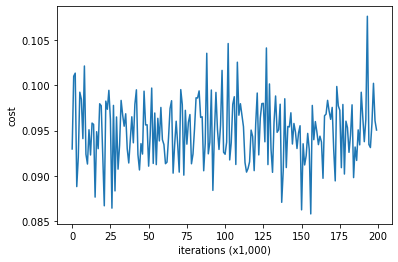

In [161]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(loss_list)
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

In [ ]:
len(news[news['Label']==0])

In [20]:
len(news[news['Label']==1])

24959

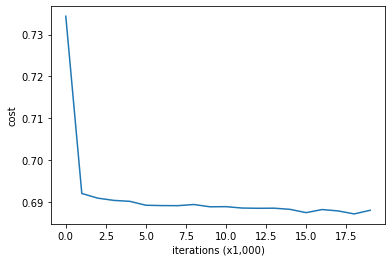

In [134]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(loss_list[:20])
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

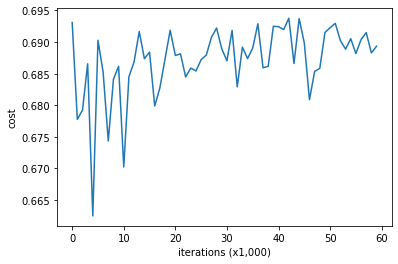

In [130]:
import matplotlib.pyplot as plt

# plot the cost
plt.plot(f_list)
plt.ylabel('cost')
plt.xlabel('iterations (x1,000)')
plt.show()

* https://medium.com/@martinpella/how-to-use-pre-trained-word-embeddings-in-pytorch-71ca59249f76